# Exercise 2: Data Processing and Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter
    grader = otter.Notebook()

except:
    
    !pip install otter-grader
    import otter 
    grader = otter.Notebook()

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [2]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [3]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [4]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()
print(minimumHeartRate, maximumHeartRate)

40.0 296.5939695131042


In [5]:
#check('tests/q1.py')

grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [6]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

450


In [7]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [8]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
print(HeartRateMean)


75.13268404820141


In [9]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_5669/936369900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_5669/936369900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


In [10]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
print(fullTableHRMean)

75.13268404820141


In [11]:
#check('tests/q2.py')

grader.check('q2')

Question 2 results:
    Question 2 - 1 result:
        ❌ Test case failed
        Trying:
            bool((HeartRateMean == 75.13268404820141) or (HeartRateMean == np.float64(75.13268404820141)))
        Expecting:
            True
        ok
        Trying:
            HeartRateMean == fullTableHRMean
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 2 0
        Failed example:
            HeartRateMean == fullTableHRMean
        Expected:
            True
        Got:
            np.True_

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

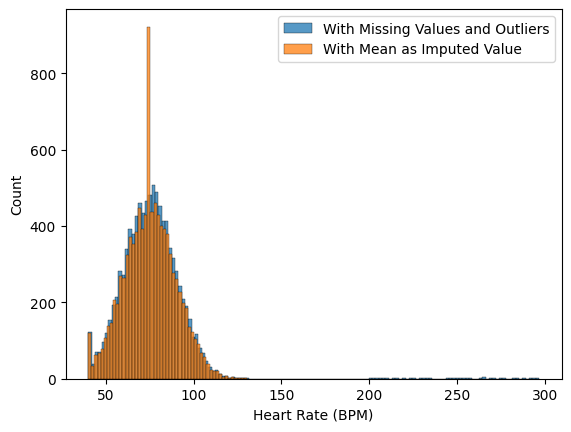

In [12]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: The median slightly decreases as there are no longer outliers on the tail, they are instead placed where the mean value is. This shifts the order of the data, changing the median. 

...

In [13]:
## coding cell to check the difference in median values 

HRImputedMedian = smartwatch_hr['Heart Rate (BPM)'].median()
HRMissingMedian = smartwatch['Heart Rate (BPM)'].median()

print(HRImputedMedian, HRMissingMedian)


75.13268404820141 75.22060125775644


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [15]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [14]:
#check('tests/q4.py')

grader.check('q4')

Question 4 results:
    Question 4 - 1 result:
        ❌ Test case failed
        Trying:
            bool((minBloodO2 == 90.79120814564097) or (minBloodO2 == np.float64(90.79120814564097)))
        Expecting:
            True
        **********************************************************************
        Line 3, in Question 4 0
        Failed example:
            bool((minBloodO2 == 90.79120814564097) or (minBloodO2 == np.float64(90.79120814564097)))
        Exception raised:
            Traceback (most recent call last):
              File "/home/codespace/.python/current/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest Question 4 0[0]>", line 1, in <module>
                bool((minBloodO2 == 90.79120814564097) or (minBloodO2 == np.float64(90.79120814564097)))
                      ^^^^^^^^^^
            NameError: name 'minBloodO2' is not defined
        Trying:
            bool((maxBloodO2 == 100.0) or (maxBloodO2 == np.float64(100.0)))
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 4 0
        Failed example:
            bool((maxBloodO2 == 100.0) or (maxBloodO2 == np.float64(100.0)))
        Exception raised:
            Traceback (most recent call last):
              File "/home/codespace/.python/current/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest Question 4 0[1]>", line 1, in <module>
                bool((maxBloodO2 == 100.0) or (maxBloodO2 == np.float64(100.0)))
                      ^^^^^^^^^^
            NameError: name 'maxBloodO2' is not defined
        Trying:
            bool((meanBloodO2 == 97.84158102099076) or (meanBloodO2 == np.float64(97.84158102099076)))
        Expecting:
            True
        **********************************************************************
        Line 7, in Question 4 0
        Failed example:
            bool((meanBloodO2 == 97.84158102099076) or (meanBloodO2 == np.float64(97.84158102099076)))
        Exception raised:
            Traceback (most recent call last):
              File "/home/codespace/.python/current/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest Question 4 0[2]>", line 1, in <module>
                bool((meanBloodO2 == 97.84158102099076) or (meanBloodO2 == np.float64(97.84158102099076)))
                      ^^^^^^^^^^^
            NameError: name 'meanBloodO2' is not defined

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

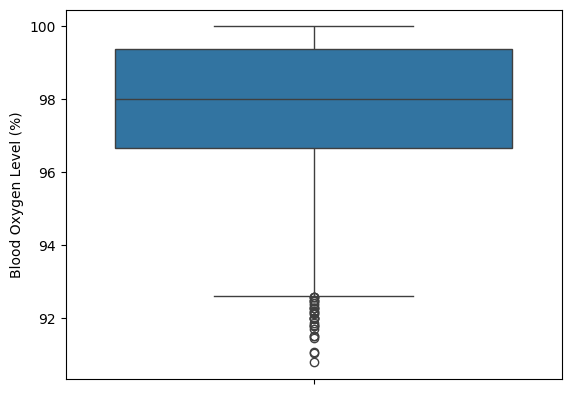

In [15]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: I decided to remove outliers of blood oxygen levels below 92.5. I did this because this way I can still include individuals who had very low blood oxygen levels due to health issues, but removes more exreme outliers that are likely results of errors in the data.

....

In [16]:
## use this space or additional cells to deal with the missing/outlier values. 
outlierBlood02 = smartwatch[smartwatch['Blood Oxygen Level (%)'] < 92.5]
nullHeartBlood02 = smartwatch[smartwatch['Blood Oxygen Level (%)'].isnull()]
Blood02Rows = smartwatch[(~smartwatch['Blood Oxygen Level (%)'].isnull()) & (smartwatch['Blood Oxygen Level (%)'] >= 92.5)]
smartwatch_02 = pd.concat([Blood02Rows, nullHeartBlood02, outlierBlood02])


print(smartwatch_02)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
...       ...               ...                     ...           ...   
8170   1705.0         77.218179               92.009195   3153.222280   
9007   1110.0         54.061581               92.159270  15096.038740   
9553   1992.0         72.889579               91.973218   2367.280481   
9577   2341.0         61.844491               90.791208   9594.119586   
9797   4342.0         57.523789               92.289059   7163.497538   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
1      

Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

0.9101380609604088 62486.690753464914 6985.685884992229


<Axes: xlabel='Step Count', ylabel='Count'>

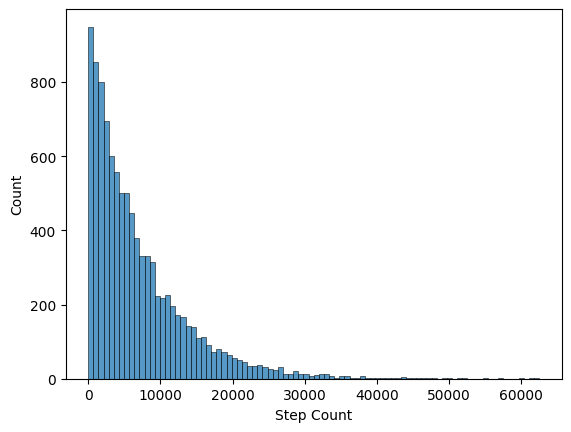

In [17]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

print(minSteps, maxSteps, meanSteps)

#sns.boxplot(smartwatch['Step Count'])

sns.histplot(smartwatch['Step Count'])

In [20]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: Looking at the boxplot, there do not appear to be any exteme outliers. While very low step counts did occur, they appear to be quite common and therefore should be continued to be displayed as this clearly has a meaning. The higher step counts (over 40,000), while extremely high could be ultra runners.

....

In [18]:
## use this space or additional cells to address the missing or outlier data. 

smartwatch_steps = smartwatch_02

print(smartwatch_steps)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
...       ...               ...                     ...           ...   
8170   1705.0         77.218179               92.009195   3153.222280   
9007   1110.0         54.061581               92.159270  15096.038740   
9553   1992.0         72.889579               91.973218   2367.280481   
9577   2341.0         61.844491               90.791208   9594.119586   
9797   4342.0         57.523789               92.289059   7163.497538   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
1      

Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [22]:
minSleep = smartwatch['Sleep Duration (hours)'].min()

print(minSleep)

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [19]:
for sleep in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(sleep)  ## first try to see if it can be converted to a number
    except:
        print(sleep)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [20]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
62,3068.0,115.078288,99.928041,1918.372142,ERROR,Highly_Active,4
71,3041.0,64.799778,94.743857,4613.859266,ERROR,Highly_Active,10
81,4499.0,41.709895,96.857347,1413.015778,ERROR,Highly_Active,4
92,2021.0,70.243810,97.171134,2336.583406,ERROR,Highly Active,7
...,...,...,...,...,...,...,...
1245,1484.0,91.329653,NaN,522.951192,ERROR,Sedentary,7
1335,1193.0,57.231545,NaN,2184.899471,ERROR,Highly_Active,5
4500,2800.0,72.615444,NaN,5667.748281,ERROR,Sedentary,6
6035,4721.0,56.758561,NaN,430.504664,ERROR,Seddentary,4


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [21]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_5669/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,247.803052,97.052954,2826.521994,NaN,Highly Active,5
62,3068.0,115.078288,99.928041,1918.372142,NaN,Highly_Active,4
71,3041.0,64.799778,94.743857,4613.859266,NaN,Highly_Active,10
81,4499.0,41.709895,96.857347,1413.015778,NaN,Highly_Active,4
92,2021.0,70.243810,97.171134,2336.583406,NaN,Highly Active,7
...,...,...,...,...,...,...,...
1245,1484.0,91.329653,NaN,522.951192,NaN,Sedentary,7
1335,1193.0,57.231545,NaN,2184.899471,NaN,Highly_Active,5
4500,2800.0,72.615444,NaN,5667.748281,NaN,Sedentary,6
6035,4721.0,56.758561,NaN,430.504664,NaN,Seddentary,4


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [22]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167236,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,NaN,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367790,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
8170,1705.0,77.218179,92.009195,3153.222280,6.419177,Highly Active,3
9007,1110.0,54.061581,92.159270,15096.038740,NaN,Seddentary,9
9553,1992.0,72.889579,91.973218,2367.280481,7.367893,Active,5
9577,2341.0,61.844491,90.791208,9594.119586,5.935194,Active,3


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

-0.1944527906201543 12.140232872862926 6.505462918406444


<Axes: ylabel='Sleep Duration (hours)'>

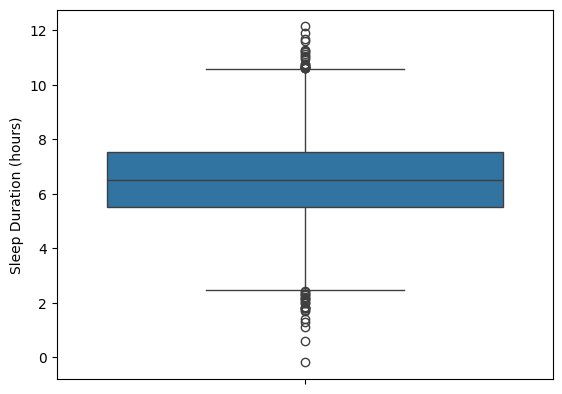

In [23]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()

maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()

meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

print(minSleep, maxSleep, meanSleep)

sns.boxplot(smartwatch_sleep['Sleep Duration (hours)'])

In [ ]:
grader.check("q8")

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: It is not possible for someone to get negative hours of sleep, so I will remove the values that indicate that the watch wearer got less than zero hours of sleep. I will keep the rest of the high and low hours of sleep because realistically sometimes a person will (sadly) go without sleep, either from insomnia or pulling an all nighter, and sometimes people will sleep 12 hours.

....

In [24]:
## use this space or additional cells to address the missing or outlier data. 


smartwatch_updated_sleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] >= 0]
print(smartwatch_updated_sleep)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
3      2294.0         40.000000               96.894213  13797.338044   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
7806   2094.0         81.651301               91.788210   7619.849709   
8170   1705.0         77.218179               92.009195   3153.222280   
9553   1992.0         72.889579               91.973218   2367.280481   
9577   2341.0         61.844491               90.791208   9594.119586   
9797   4342.0         57.523789               92.289059   7163.497538   

      Sleep Duration (hours) Activity Level Stress Level  
0                   7.167236  Highly Active            1  
1    

We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [25]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

nan
Very High


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: Very high would indicate a number high on the 1-10 scaled used for this varible. Very high could be anywhere from 8-10, so I would change very high to be 9 which is in the middle to best account for individual differences in what "very high" means.

In [26]:
## cell to deal with 'Very High' value

smartwatch_updated_sleep["Stress Level"].replace('Very High', 9, inplace=True)
smartwatch_stress = smartwatch_updated_sleep
smartwatch_stress


/tmp/ipykernel_5669/4108545122.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smartwatch_updated_sleep["Stress Level"].replace('Very High', 9, inplace=True)
/tmp/ipykernel_5669/4108545122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_updated_sleep["Stress Level"].replace('Very High', 9, inplace=True)


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167236,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239,Highly_Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367790,Actve,3
5,2095.0,96.285938,94.202910,10205.992256,8.378343,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146,Seddentary,2
...,...,...,...,...,...,...,...
7806,2094.0,81.651301,91.788210,7619.849709,4.650706,Sedentary,5
8170,1705.0,77.218179,92.009195,3153.222280,6.419177,Highly Active,3
9553,1992.0,72.889579,91.973218,2367.280481,7.367893,Active,5
9577,2341.0,61.844491,90.791208,9594.119586,5.935194,Active,3


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [27]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [28]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active' ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Active') | (smartwatch_stress['Activity Level'] == 'Actve')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Seddentary') | (smartwatch_stress['Activity Level'] == 'Sedentary')]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_5669/3001884869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active' ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_5669/3001884869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_5669/3001884869.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
0,4174.0,58.939776,98.809650,5450.390578,7.167236,Highly Active,1,1.0
1,NaN,NaN,98.532195,727.601610,6.538239,Highly Active,5,1.0
5,2095.0,96.285938,94.202910,10205.992256,8.378343,Highly Active,10,1.0
12,1330.0,95.372290,99.152652,6155.837342,5.814348,Highly Active,10,1.0
14,3135.0,68.090203,99.729740,8124.135791,6.444870,Highly Active,5,1.0
...,...,...,...,...,...,...,...,...
2442,3781.0,65.719287,NaN,21149.700535,5.701224,NaN,2,NaN
4690,2829.0,NaN,NaN,6610.794796,7.770459,NaN,9,NaN
4926,3241.0,83.648126,NaN,261.604794,5.505325,NaN,8,NaN
5715,4622.0,57.640076,NaN,6798.525429,6.776021,NaN,7,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [29]:
final_table.isnull().sum()

User ID                   189
Heart Rate (BPM)          385
Blood Oxygen Level (%)    289
Step Count                 95
Sleep Duration (hours)      0
Activity Level            197
Stress Level              193
NumActivity               197
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [30]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9602 entries, 0 to 389
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9413 non-null   float64
 1   Heart Rate (BPM)        9217 non-null   float64
 2   Blood Oxygen Level (%)  9313 non-null   float64
 3   Step Count              9507 non-null   float64
 4   Sleep Duration (hours)  9602 non-null   float64
 5   Activity Level          9405 non-null   object 
 6   Stress Level            9409 non-null   object 
 7   NumActivity             9405 non-null   float64
dtypes: float64(6), object(2)
memory usage: 675.1+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER: Smaller points make it easier to see how many and where points lie. Bigger points make the figure look like blobs, making it hard to differientiate outside of the general shape of the plot. We a smaller point size you can see where we mean imputated the heart rate data.

...

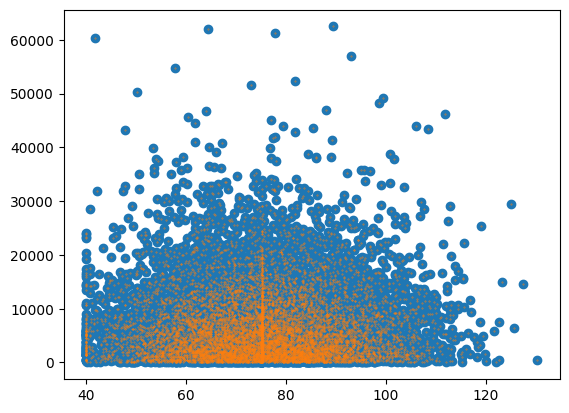

In [31]:
plt.scatter(smartwatch_hr['Heart Rate (BPM)'], smartwatch_steps['Step Count'])
plt.scatter(smartwatch_hr['Heart Rate (BPM)'], smartwatch_steps['Step Count'], s=.1)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER: This figure is a little more spread out due to the outliers remaining. The first figure indicates easily where the mean impuated values are by the line that is made in points around the 75 pbm mark. 

...

In [32]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

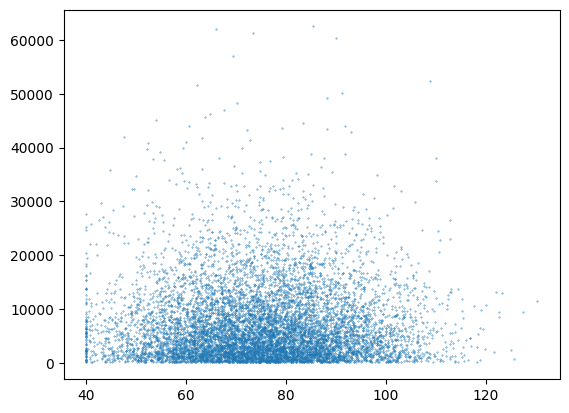

In [33]:
plt.scatter(nanTable["Heart Rate (BPM)"], nanTable['Step Count'], s = .1)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: xlabel='Activity Level', ylabel='Step Count'>

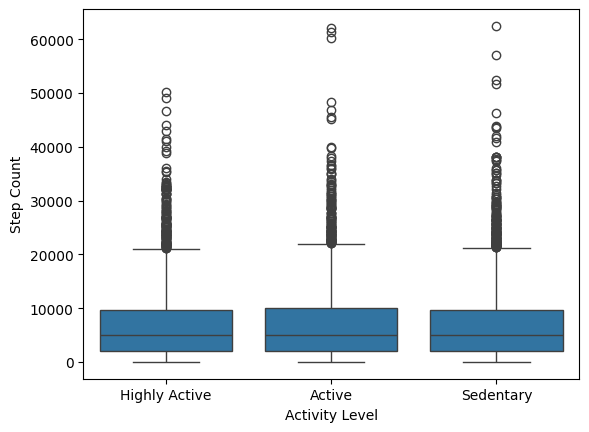

In [34]:
## Visualization 

sns.boxplot(x='Activity Level', y='Step Count', data=final_table)


In [37]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['Activity Level'] == 'Sedentary']
act = final_table[final_table['Activity Level'] == 'Active']
hact = final_table[final_table['Activity Level'] == 'Highly Active']

stat, pval = f_oneway(sed['Step Count'].dropna(), act['Step Count'].dropna(), hact['Step Count'].dropna())


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.179, p-value: 0.836


In [46]:
final_table
sed
act
hact

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity


Is there significant difference between the groups' step counts?  

ANSWER: no there is not a significant differece between the groups' step counts.

...

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER: Due to not seeing a significant difference in step counts between activity levels, it is unlikely that the amount of steps a person walks per day is a predictor for their activity levels. Rather than focusing on what inferences I can make based off these results, I instead focus on what the data is actually showing, or in this case not showing. This way I am limiting the amount of misconceptions I could accidentally include in my communication of the key insights. 

....